In [57]:
#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un chicchier __init__.py 
#et également l'ajouter au PATH
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/american-dream")


#On peut ensuite importer le dossier comme un module

from src.d00_utils.sqlite_utils import db_connect

In [58]:
# Connection with BDD version 1 (raw data lives there).

con = db_connect('../Data/02_intermediate/american_dream_v2.db')
cur = con.cursor()
cur.execute('pragma encoding=UTF8')
query_df1 = """
    SELECT * FROM salary_survey
"""

query_dfk = """
    SELECT * FROM dataset_kaggle
"""


df1 = pd.read_sql(query_df1,con=con)
dfk = pd.read_sql(query_dfk,con=con)

In [59]:
df1.shape
dfk.head()

,index,id,job_title,salary_estimate,company_name,location,min_salary,max_salary,state,mean_salary
0,0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice,New York,37000.0,66000,NY,51500.0
1,1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York,New York,37000.0,66000,NY,51500.0
2,2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Squarespace,New York,37000.0,66000,NY,51500.0
3,3,3,Data Analyst,$37K-$66K (Glassdoor est.),Celerity,New York,37000.0,66000,NY,51500.0
4,4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),FanDuel,New York,37000.0,66000,NY,51500.0


<Figure size 2160x1440 with 0 Axes>

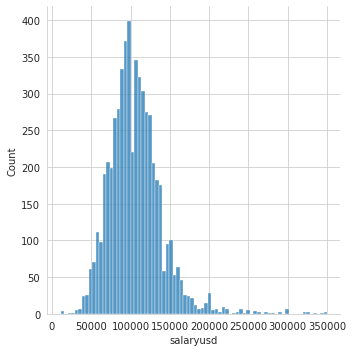

In [60]:
plt.figure(figsize=(30,20))
sns.displot(data=df1, x="salaryusd", kde=False)

In [61]:
median_salary_usa = round(df1['salaryusd'].median())
mean_salary_usa = round(df1['salaryusd'].describe()['mean'])

print("Le salaire moyen au USA est de {}$ et le salaire median est de {}$.(Base: Excel survey)".format(mean_salary_usa, median_salary_usa))
perc = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
df1['salaryusd'].describe(percentiles=perc)

Le salaire moyen au USA est de 106366$ et le salaire median est de 103000$.(Base: Excel survey)


count      5593.000000
mean     106365.748614
std       34256.961212
min       11100.000000
10%       68000.000000
20%       80000.000000
30%       89000.000000
40%       95000.000000
50%      103000.000000
60%      110000.000000
70%      120000.000000
80%      130000.000000
90%      145000.000000
max      350000.000000
Name: salaryusd, dtype: float64

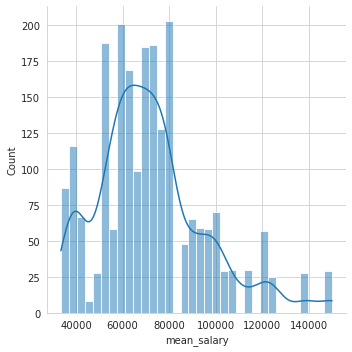

In [62]:
sns.displot(data=dfk, x="mean_salary", kde=True)

In [63]:
median_salary_usa2 = round(dfk['mean_salary'].median())
mean_salary_usa2 = round(dfk['mean_salary'].describe()['mean'])

print("Le salaire moyen au USA est de {}$ et le salaire median est de {}$.(Base: Kaggle)".format(mean_salary_usa2, median_salary_usa2))
dfk['mean_salary'].describe(percentiles=perc)

Le salaire moyen au USA est de 72121$ et le salaire median est de 69000$.(Base: Kaggle)


count      2251.000000
mean      72121.279431
std       23605.836291
min       33500.000000
10%       40500.000000
20%       53500.000000
30%       59500.000000
40%       63500.000000
50%       69000.000000
60%       73500.000000
70%       79000.000000
80%       88500.000000
90%      104500.000000
max      150000.000000
Name: mean_salary, dtype: float64

# Mean salary based on the job title + diagramme ciculaire de la repartition de ces jobtitles

Text(0, 0.5, '')

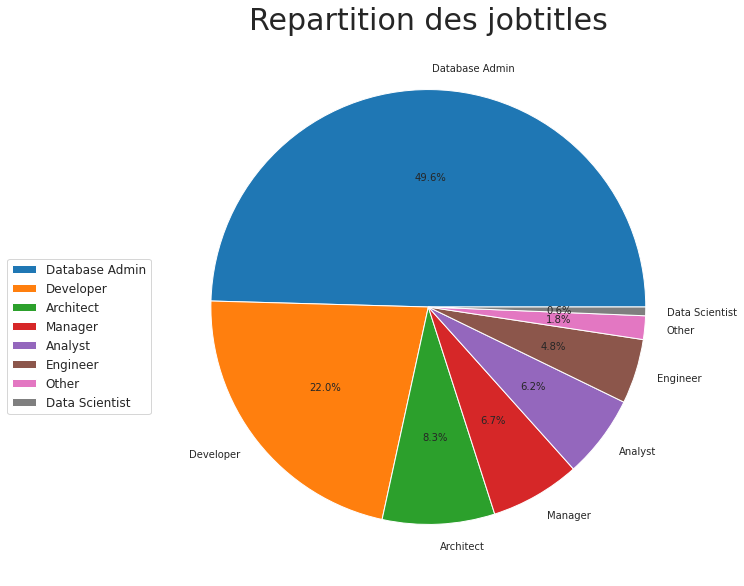

In [64]:
sns.set_style("whitegrid")
job_title_data = df1['jobtitle'].value_counts()
pie = plt.subplots(figsize=[20,10])
labels = df1["jobtitle"].value_counts().index
job_title_data.plot.pie(autopct="%.1f%%")
plt.title("Repartition des jobtitles", fontsize=30)
plt.legend(labels,bbox_to_anchor=(0, 0.60),fontsize=12)
plt.ylabel('')

jobtitle
Analyst            79323.327536
Architect         135960.935760
Data Scientist    121488.694444
Database Admin    104876.328283
Developer          99799.980519
Engineer          110747.947955
Manager           124542.475936
Other              98254.000000
Name: salaryusd, dtype: float64


<AxesSubplot:title={'center':'Répartition de salaires en fonction des job titles'}, xlabel='jobtitle', ylabel='salaryusd'>

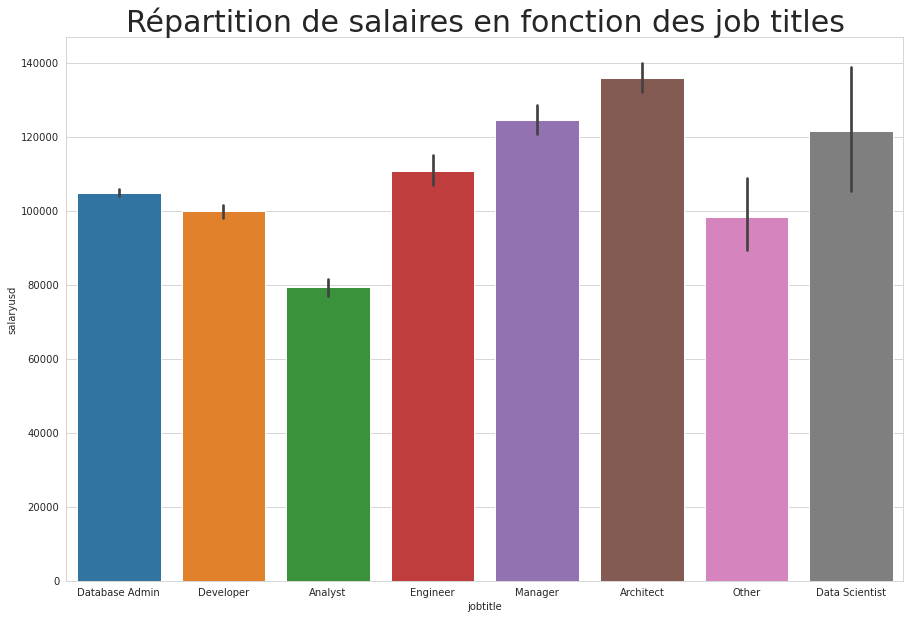

In [65]:
print(df1.groupby(df1['jobtitle'])['salaryusd'].mean())
plt.subplots(figsize=[15,10])
plt.title('Répartition de salaires en fonction des job titles', fontsize=30)
sns.barplot(x=df1['jobtitle'], y=df1['salaryusd'])

# Mean salary based on if you worked in one or more companies

howmanycompanies
1             97061.942623
2            107350.704062
3            117631.048387
4            119172.512397
5            122923.388235
6+           137034.200000
Not Asked    105235.876883
Name: salaryusd, dtype: float64


Text(0, 0.5, 'Salaire en Dollars')

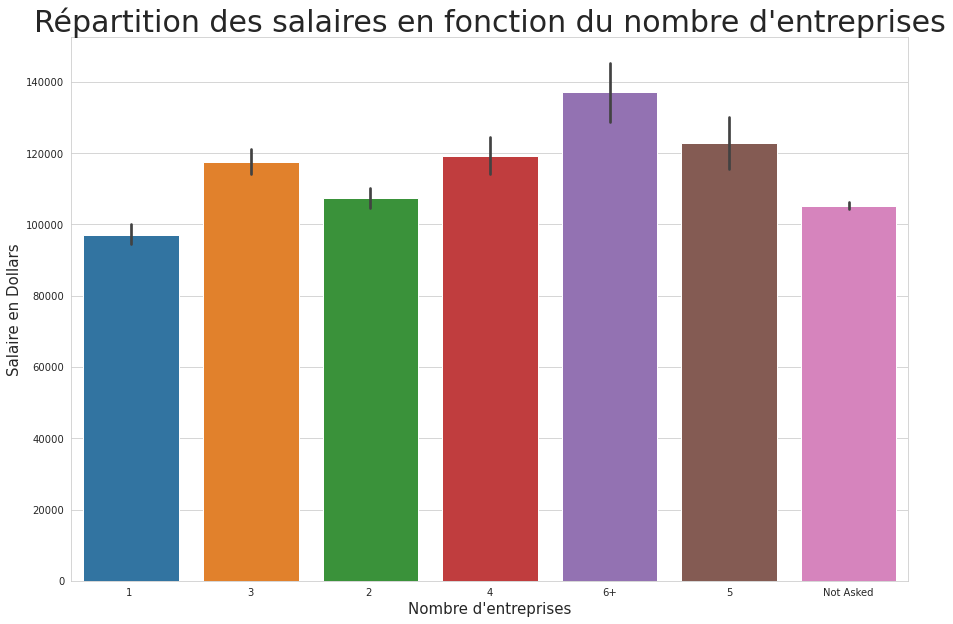

In [66]:
mean_by_nb_companies = df1.groupby(df1['howmanycompanies'])['salaryusd'].mean()
print(mean_by_nb_companies)
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction du nombre d\'entreprises', fontsize=30)
sns.barplot(x=df1['howmanycompanies'], y=df1['salaryusd'])
plt.xlabel('Nombre d\'entreprises', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)


**Conclusion:** D'après ce graphique, les personnes qui ont travaillé dans un plus grand nombre d'entreprises différentes ont, le plus souvent, des salaires plus élevés.

# Number of team mates impact your salary ?

Text(0, 0.5, 'Salaire en Dollars')

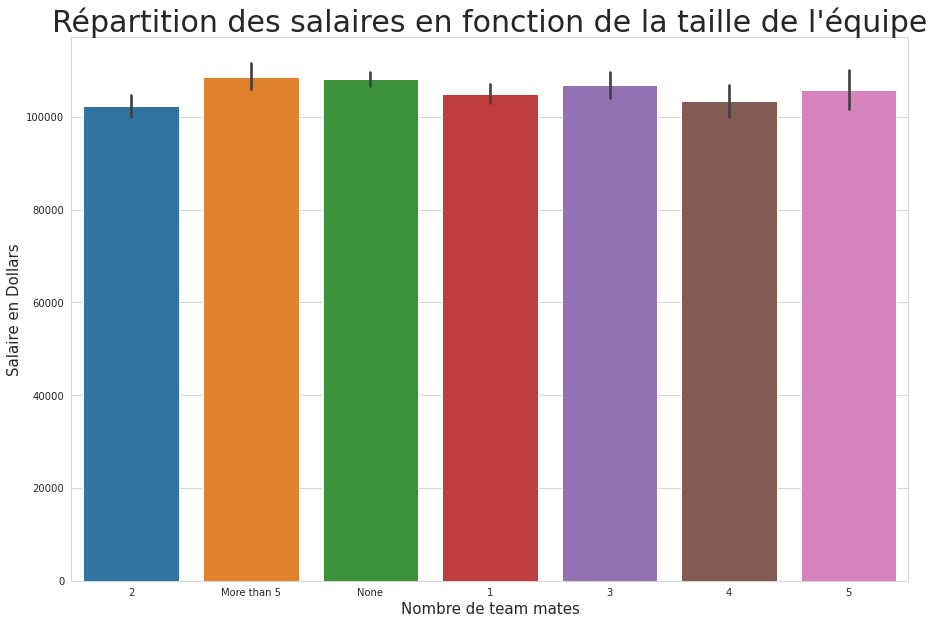

In [67]:
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction de la taille de l\'équipe', fontsize=30)
sns.barplot(x=df1['otherpeopleonyourteam'], y=df1['salaryusd'])
plt.xlabel('Nombre de team mates', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)


**Conclusion :** Le nombre de personnes dans une equipe n'a pas l'air d'affecter de façon notable le salaire des employés

# Does the number of years of experience in that kinf of field impact your salary ?

Text(0, 0.5, 'Salaire en Dollars')

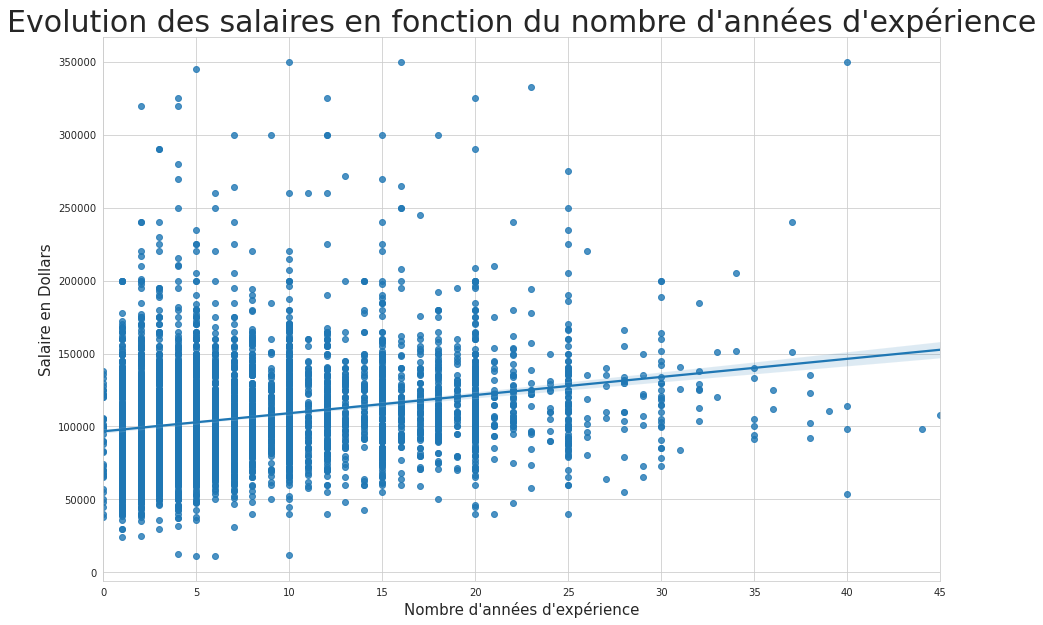

In [68]:
plt.subplots(figsize=[15,10])
plt.title('Evolution des salaires en fonction du nombre d\'années d\'expérience', fontsize=30)
sns.regplot(x=df1['yearswiththistypeofjob'], y=df1['salaryusd'])
plt.xlabel('Nombre d\'années d\'expérience', fontsize=15)

plt.ylabel('Salaire en Dollars', fontsize=15)

# Is there a disparity between women's salary and men's salary ?

Le salaire moyen pour un homme dans le domaine I.T est de 107866.0$ et le salaire moyen pour une femme dans ce meme domaine est de 100988.0$


<AxesSubplot:xlabel='gender', ylabel='salaryusd'>

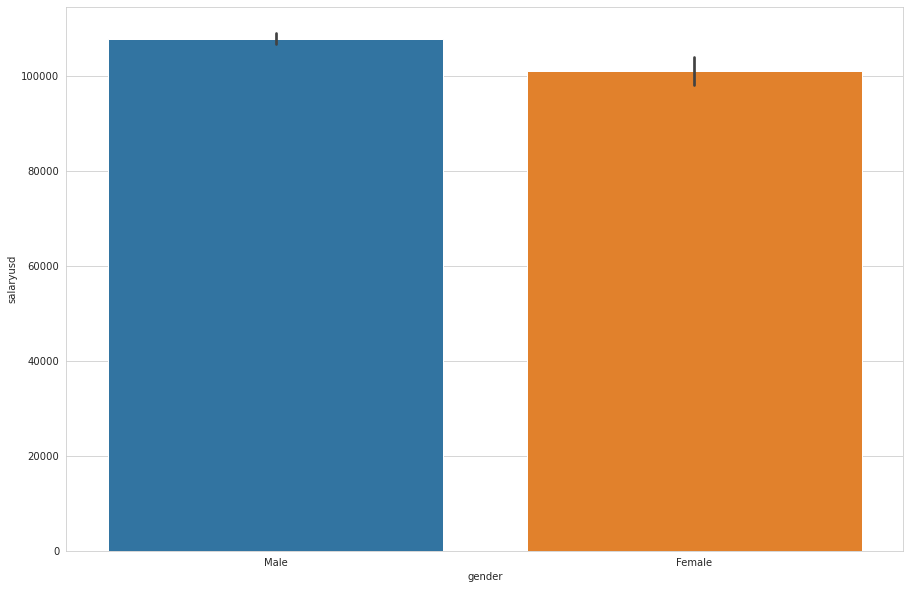

In [69]:
df1 = df1[df1['gender'] != 'Other']
mean_salary_by_gender = round(df1.groupby(df1['gender'])['salaryusd'].mean())
print('Le salaire moyen pour un homme dans le domaine I.T est de {}$ et le salaire moyen pour une femme dans ce meme domaine est de {}$'.format(mean_salary_by_gender.values[1], mean_salary_by_gender.values[0]))
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['gender'], y=df1['salaryusd'])


The disparity between the salary of a woman and a man in IT fields isn't big. The gap is pretty little. Men tend to earn a bit more tough.

# Salary comparison by gender and by job title

<AxesSubplot:xlabel='jobtitle', ylabel='salaryusd'>

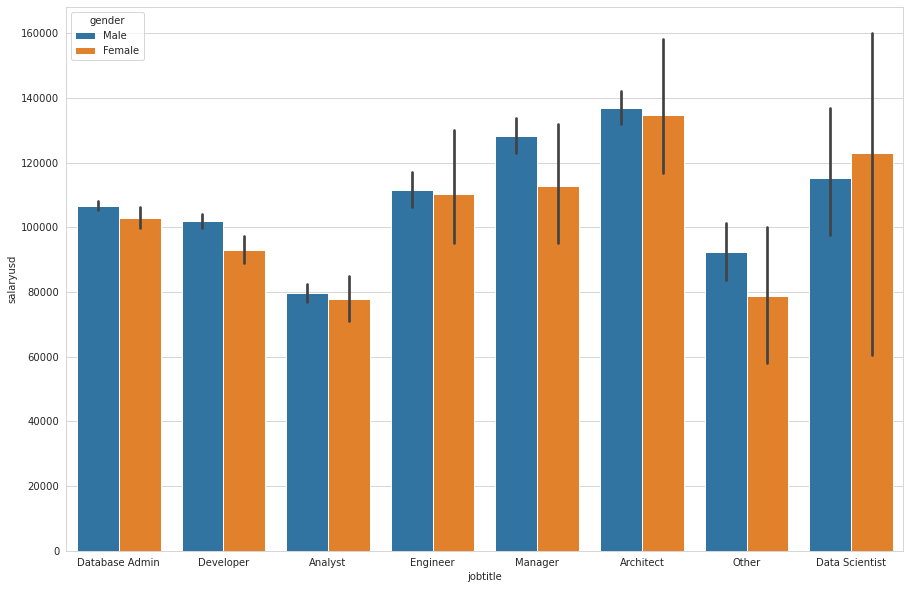

In [70]:
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['jobtitle'], y=df1['salaryusd'], hue=df1['gender'])

<AxesSubplot:xlabel='jobtitle', ylabel='yearswiththistypeofjob'>

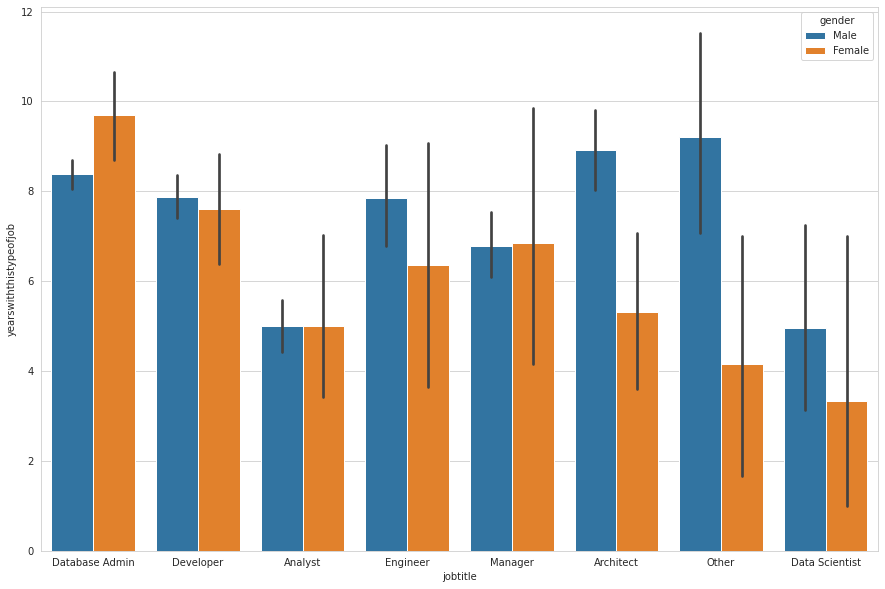

In [71]:
df1.groupby(['jobtitle', 'gender'])['salaryusd'].mean()
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['jobtitle'], y=df1['yearswiththistypeofjob'], hue=df1['gender'])